<h1 style="color:rgb(0,120,170)">Assignment 5: Ensemble Methods</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potentially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Task 1: AdaBoostM1 is an instance of forward stagewise modelling</h2>


In the lecture it was mentioned that one of the first boosting algorithms, i.e. AdaBoostM1, is equivalent to forward stagewise modelling using the exponential loss $L(y,g(\mathbf{x}))=\exp(-yg(\mathbf{x}))$ for a binary classification problem ( $y\in \left\{ -1,1 \right\}$ ). In this task we intend to provide proof of this fact. We will guide you through the most important steps and you will have to add some details.

For AdaBoostM1, the basis functions at timestep $n$ are the individual classifiers $b_n(\mathbf{x}) \in \left\{ -1,1 \right\}$. We assume that all of them are slightly better than random guessing. Note that we use $b_n$ here for the resulting classifier at timestep $n$, which differs slightly from the notation in the slides, mainly to not confuse it with the corresponding approximation from forward stagewise modelling, which is also called $g_n$ there. 

Using the exponential loss in each timestep $n$ we have to solve 
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l \exp(-y_i(g_{n-1}(\mathbf{x}_i)+\beta b(\mathbf{x}_i)),$$ for the classifier $b_n$ and the coefficient $\beta_n$ which are added at each step. This can be rewritten as
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)), \qquad (1)$$ with $w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$. Since each $w^{(n)}_i$ depends neither on $\beta$ nor $b$, it can be regarded as a weight that is applied to each observation. This weight depends on $g_{n−1}(\mathbf{x}_i)$, and so the individual weight values change with each iteration $n$. The solution of (1) can be found in two steps:

<h3 style="color:rgb(210,90,80)">Calculation 1.1 (10 Points):</h3>

In the **first step** fix $\beta \geq 0$ and show that in this case the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$. Hints:<ol>
<li>Try to write the expressions in (1) after $\arg \min$ in the form $\sum_{b(\mathbf{x}_i)=y_i}(...)+\sum_{b(\mathbf{x}_i)\ne y_i}(...)$. <br>Find the right expressions for (...), such that the product $b(\mathbf{x}_i)y_i$ doesn't appear there anymore.<br><br>
<li>Now show that this can be written as <br>$(\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}.\qquad (2)$ <br>The equation $\sum_{i} w_i^{(n)} = \sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)} + \sum_{b(\mathbf{x}_i)= y_i}w_i^{(n)}$ might be helpful.<br><br>    
<li>Argue why this already implies the claim, i.e., the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$.</li></ol>
    

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

YOUR ANSWER HERE

**Objective:**  
Fix $\beta \geq 0$ and show that the solution to equation (1):

$$
(\beta_n, b_n) = \arg \min_{\beta, b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i))
$$

is 

$$
b_n = \arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)
$$

**Solution:**

1. **Splitting the Summation:**  
   We start by splitting the summation based on whether the classifier $b(\mathbf{x}_i)$ correctly classifies the instance or not:

   $$
   \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)) = \sum_{b(\mathbf{x}_i) = y_i} w_i^{(n)} \exp(-y_i \beta y_i) + \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)} \exp(-y_i \beta (-y_i))
   $$

   Simplifying the exponents:

   $$
   = \sum_{b(\mathbf{x}_i) = y_i} w_i^{(n)} \exp(-\beta) + \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)} \exp(\beta)
   $$

2. **Rewriting the Expression:**  
   Notice that $\sum_{i=1}^l w_i^{(n)} = \sum_{b(\mathbf{x}_i) = y_i} w_i^{(n)} + \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)}$. Therefore, the expression becomes:

   $$
   \exp(-\beta) \sum_{b(\mathbf{x}_i) = y_i} w_i^{(n)} + \exp(\beta) \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)}
   $$

   This can be rewritten as:

   $$
   (\exp(\beta) - \exp(-\beta)) \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)} + \exp(-\beta) \sum_{i=1}^l w_i^{(n)}
   $$

   which matches equation (2).

3. **Implication for $b_n$:**  
   Since $\beta$ is fixed and $\exp(\beta) - \exp(-\beta) > 0$, minimizing the expression is equivalent to minimizing the term $\sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)}$. Therefore, the optimal classifier $b_n$ is:

   $$
   b_n = \arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)
   $$

**Conclusion:**  
By fixing $\beta \geq 0$ and splitting the summation based on correct and incorrect classifications, we have shown that the optimal classifier $b_n$ minimizes the weighted classification error.


<h3 style="color:rgb(210,90,80)">Calculation 1.2 (20 Points):</h3>


In the **second step** you need to optimize the following expression with respect to $\beta$:$$(\exp(\beta)-\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}$$ Hint: do it in the usual way (i.e. by differentiating the expression and setting it to $0$). <br><br>
Using the abbreviation $\text{err}_n= \frac{\sum_{i=1}^l w_i^{(n)} I(y_i \ne b_n(\mathbf{x}_i))}{\sum_{i=1}^l w_i^{(n)}}$ show that the obtained expression is $\beta_n=\frac12 \ln \frac{1-\text{err}_n}{\text{err}_n}$. <br>
Note that $\beta_n \geq 0$, by our assumption that all classifiers are better than random guessing, i.e. $\text{err}_n \le \frac12$, so the result is in accordance with the previous subtask.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

YOUR ANSWER HERE

**Objective:**  
Optimize the expression with respect to $\beta$:

$$
(\exp(\beta) - \exp(-\beta)) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} + \exp(-\beta) \sum_{i=1}^l w_i^{(n)}
$$

Using the abbreviation $\text{err}_n = \frac{\sum_{i=1}^l w_i^{(n)} I(y_i \ne b_n(\mathbf{x}_i))}{\sum_{i=1}^l w_i^{(n)}}$, show that the optimal $\beta_n$ is:

$$
\beta_n = \frac{1}{2} \ln \frac{1 - \text{err}_n}{\text{err}_n}
$$

**Solution:**

1. **Expressing the Objective Function:**  
   Let $S = \sum_{i=1}^l w_i^{(n)}$ and $E = \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)}$. The objective function becomes:

   $$
   (\exp(\beta) - \exp(-\beta)) E + \exp(-\beta) S
   $$

2. **Taking the Derivative with Respect to $\beta$:**  
   Differentiate the objective function with respect to $\beta$ and set it to zero for optimization:

   $$
   \frac{d}{d\beta} \left[ (\exp(\beta) - \exp(-\beta)) E + \exp(-\beta) S \right] = 0
   $$

   Calculating the derivative:

   $$
   \exp(\beta) E + \exp(-\beta) E - \exp(-\beta) S = 0
   $$

   Simplifying:

   $$
   \exp(\beta) E + \exp(-\beta) (E - S) = 0
   $$

3. **Solving for $\beta$:**  
   Rearranging the terms:

   $$
   \exp(\beta) E = \exp(-\beta) (S - E)
   $$

   Multiplying both sides by $\exp(\beta)$:

   $$
   \exp(2\beta) E = S - E
   $$

   Solving for $\exp(2\beta)$:

   $$
   \exp(2\beta) = \frac{S - E}{E} = \frac{S}{E} - 1
   $$

   Taking the natural logarithm:

   $$
   2\beta = \ln \left( \frac{S}{E} - 1 \right )
   $$

   Therefore:

   $$
   \beta = \frac{1}{2} \ln \left( \frac{S - E}{E} \right ) = \frac{1}{2} \ln \left( \frac{1 - \text{err}_n}{\text{err}_n} \right )
   $$

   where $\text{err}_n = \frac{E}{S}$.

**Conclusion:**  
By differentiating the objective function and solving for $\beta$, we obtain the optimal coefficient:

$$
\beta_n = \frac{1}{2} \ln \frac{1 - \text{err}_n}{\text{err}_n}
$$

This ensures that $\beta_n \geq 0$ since $\text{err}_n \leq \frac{1}{2}$, aligning with the assumption that classifiers are better than random guessing.


<h3 style="color:rgb(210,90,80)">Calculation 1.3 (10 Points):</h3>

In the **final step** we can update the approximation as follows: $g_n(\mathbf{x})=g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x})$. To finish the proof proceed by deriving the following relations:
<ol>
    <li>The weights for the next generation can be computed as follows: $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$.</li>
    <li>$-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$</li>
    <li>Use these two relations to show that: $$w_i^{(n+1)}=w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i))) \qquad (2)$$ where $\alpha_n=2\beta_n$ is the $\alpha_n$ from the AdaBoostM1 algorithm from the lecture.</li>
</ol>

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

YOUR ANSWER HERE

**Objective:**  
Update the approximation as $g_n(\mathbf{x}) = g_{n-1}(\mathbf{x}) + \beta_n b_n(\mathbf{x})$. Derive the following relations:

1. The weights for the next generation:

   $$
   w_i^{(n+1)} = w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}_i))
   $$

2. The relation:

   $$
   -y_i b_n(\mathbf{x}_i) = 2 I(y_i \ne b_n(\mathbf{x}_i)) - 1
   $$

3. Using the above, show that:

   $$
   w_i^{(n+1)} = w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i)))
   $$

   where $\alpha_n = 2\beta_n$ is the $\alpha_n$ from the AdaBoostM1 algorithm.

**Solution:**

1. **Updating Weights:**  
   The new weights are updated according to:

   $$
   w_i^{(n+1)} = w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}_i))
   $$

2. **Expressing $-y_i b_n(\mathbf{x}_i)$:**  
   Since $y_i, b_n(\mathbf{x}_i) \in \{-1, 1\}$, the product $y_i b_n(\mathbf{x}_i)$ equals $1$ if the prediction is correct and $-1$ otherwise. Therefore:

   $$
   -y_i b_n(\mathbf{x}_i) = 
   \begin{cases}
   -1 & \text{if } y_i = b_n(\mathbf{x}_i) \\
   1 & \text{if } y_i \ne b_n(\mathbf{x}_i)
   \end{cases}
   = 2 I(y_i \ne b_n(\mathbf{x}_i)) - 1
   $$

3. **Substituting into the Weight Update:**  
   Substitute the expression for $-y_i b_n(\mathbf{x}_i)$ into the weight update equation:

   $$
   w_i^{(n+1)} = w_i^{(n)} \exp\left(-\beta_n (2 I(y_i \ne b_n(\mathbf{x}_i)) - 1)\right)
   $$

   Simplifying the exponent:

   $$
   = w_i^{(n)} \exp(-2\beta_n I(y_i \ne b_n(\mathbf{x}_i)) + \beta_n)
   $$

   Factor out $\exp(\beta_n)$:

   $$
   = w_i^{(n)} \exp(\beta_n) \exp(-2\beta_n I(y_i \ne b_n(\mathbf{x}_i)))
   $$

   Recognizing that $\alpha_n = 2\beta_n$:

   $$
   = w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i)))
   $$

**Conclusion:**  
By substituting and simplifying, we have derived the updated weights as:

$$
w_i^{(n+1)} = w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i)))
$$

where $\alpha_n = 2\beta_n$, consistent with the AdaBoostM1 algorithm.

<h2 style="color:rgb(0,120,170)">Task 2: Random Forests and Feature importance</h2>

In this task you will train a Random Forest (RF) Classifier on a subset of fashionMNIST. You should observe how these models can immediately give you useful information about feature importance, which is a very convenient property of RFs. 

* **Code 2.1**:
    * Firstly, implement a function called `filter_dataset()` that filters the data set for the classes with labels 3 (dresses) and 8 (bags). You should create the filtered train data set from `X_train` and `y_train` and the test data set from `X_test` and `y_test`. <br>**Hint**: Masks provide a convenient solution to this task. 
    * After the filtering procedure the data samples corresponding to dresses should be labelled as 0 and the bags as 1.
* **Code 2.2**:
    * Your task now is to train a sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"> RandomForestClassifier</a> with the default parameters on the training data set. 
    * Then get the model's predictions for the test data set. Use the given seed as random_seed for the `RandomForestClassifier`.
    * For this task, we ask you to implement the function `fit_predict()`. 
* **Code 2.3**:
    * Now, by implementing the function `get_n_wrong_samples()`, compute and return the size of the test set and number of misclassified test samples.
    * Furthermore, retrieve the misclassifed samples, their actual labels and the predicted labels from the classifier.
    * Use your predictions to plot up to 20 test data sample(s) that were **missclassified** (there can be fewer than 20 misclassified samples as well):  
* **Plot 2.4**:
    * Within this part we will try to see the decision-making incentives of Random Forest.
    To do this we ask you to implement the following tasks in the function `plot_heatmaps()`:<br>
    <b>Hint:</b> In the following you will have to plot heatmaps, to do this you might want to take a look at seaborn (sns): <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">Seaborn heatmap</a>
    <ol>
    <li>Take your training dataset and split it into 2 parts: dresses and bags. <br>
    Calculate the average of the features. Reshape the averages to 2D arrays of shape 28*28 and plot them as heatmaps.</li>
    <li>From the average of dresses subtract the average of bags. Plot the result as a heatmap.</li>
    <li>Define the feature importance of the previously trained RF classifier. Visualize it as a heatmap and don't forget to reshape it to 28*28.<br>
    <b>Hint:</b> Check scikit-learn documentation to access feature importance.</li>
    </ol> 
* **Question 2.5**:
    * Finally, answer some questions about the results of the previous exercises. 

<h3 style="color:rgb(210,90,80)">Code 2.1 (15 Points):</h3>

In [1]:
# Nothing to do here, just run the cell.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seed to ensure reproducible runs
RSEED = 10

In [2]:
# Nothing to do here, just run the cell.
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
X_train = np.array(img_train)
y_train = np.array(labels_train)
print(X_train.shape, y_train.shape)

X_test, y_test = data.load_testing()
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [3]:
def filter_dataset(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, labels_list: list[int, int]) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """This function filters the datasets w.r.t to given labels_list.
    
    So, in the end X_train and X_test only contain the samples with labels that are in labels_list and y_train and y_test only contain 2 labels (i.e. 0 and 1).

    Parameters
    ----------
    X_train : np.ndarray
        Training data matrix.
    y_train : np.ndarray
        Training labels vector.
    X_test : np.ndarray
        Test data matrix.
    y_test : np.ndarray
        Test labels vector.
    labels_list : list[int, int]
        List of length 2 which consists of integer labels.
        
    Returns
    -------
    tuple of np.ndarray
        - X_train_filtered : np.ndarray
            The train samples with either label "Dress" or "Bag".
        - y_train_filtered : np.ndarray
            The train label vector containing only 0s and 1s.
        - X_test_filtered : np.ndarray 
            The train samples with either label "Dress" or "Bag".
        - y_test_filtered : np.ndarray
            The test label vector containing only 0s and 1s.
    """
    # YOUR CODE HERE
    # Create a mask for training data where labels are in labels_list
    mask_train = np.isin(y_train, labels_list)
    X_train_filtered = X_train[mask_train]
    y_train_filtered = y_train[mask_train]
    
    # Create a mask for test data where labels are in labels_list
    mask_test = np.isin(y_test, labels_list)
    X_test_filtered = X_test[mask_test]
    y_test_filtered = y_test[mask_test]
    
    # Map the original labels to 0 and 1
    label_mapping = {labels_list[0]: 0, labels_list[1]: 1}
    y_train_filtered = np.vectorize(label_mapping.get)(y_train_filtered)
    y_test_filtered = np.vectorize(label_mapping.get)(y_test_filtered)
    
    return X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered

In [4]:
# DO NOT DELETE THIS CELL!
X_train_testing = np.arange(10).reshape(10, -1)
y_train_testing = np.concatenate((np.array([3]*2), np.array([8]*2), np.array([0]*2), np.array([2]*4)))
X_test_testing = np.arange(20, 30).reshape(10, -1)
y_test_testing = np.concatenate((np.array([2]*1), np.array([3]*4), np.array([0]*2), np.array([8]*1), np.array([0]*2)))

X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered = filter_dataset(X_train_testing, y_train_testing, X_test_testing, y_test_testing, [3, 8])

assert isinstance(X_train_filtered, np.ndarray), "The filtered X_train matrix is not a np.ndarray!"
np.testing.assert_array_equal(X_train_filtered, np.array([[0], [1], [2], [3]]))

In [5]:
# DO NOT DELETE THIS CELL!
assert isinstance(y_train_filtered, np.ndarray), "The filtered y_train vector is not a np.ndarray!"
np.testing.assert_array_equal(y_train_filtered, np.array([0, 0, 1, 1]))

In [6]:
# DO NOT DELETE THIS CELL!
assert isinstance(X_test_filtered, np.ndarray), "The filtered X_test matrix is not a np.ndarray!"
np.testing.assert_array_equal(X_test_filtered, np.array([[21], [22], [23], [24], [27]]))

In [7]:
# DO NOT DELETE THIS CELL!
assert isinstance(y_test_filtered, np.ndarray), "The filtered y_test vector is not a np.ndarray!"
np.testing.assert_array_equal(y_test_filtered, np.array([0, 0, 0, 0, 1]))

In [8]:
# Nothing to do here, just run the cell.
X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered = filter_dataset(X_train, y_train, X_test, y_test, [3, 8])

In the following we visualize a few randomly selected samples from our filtered training data:

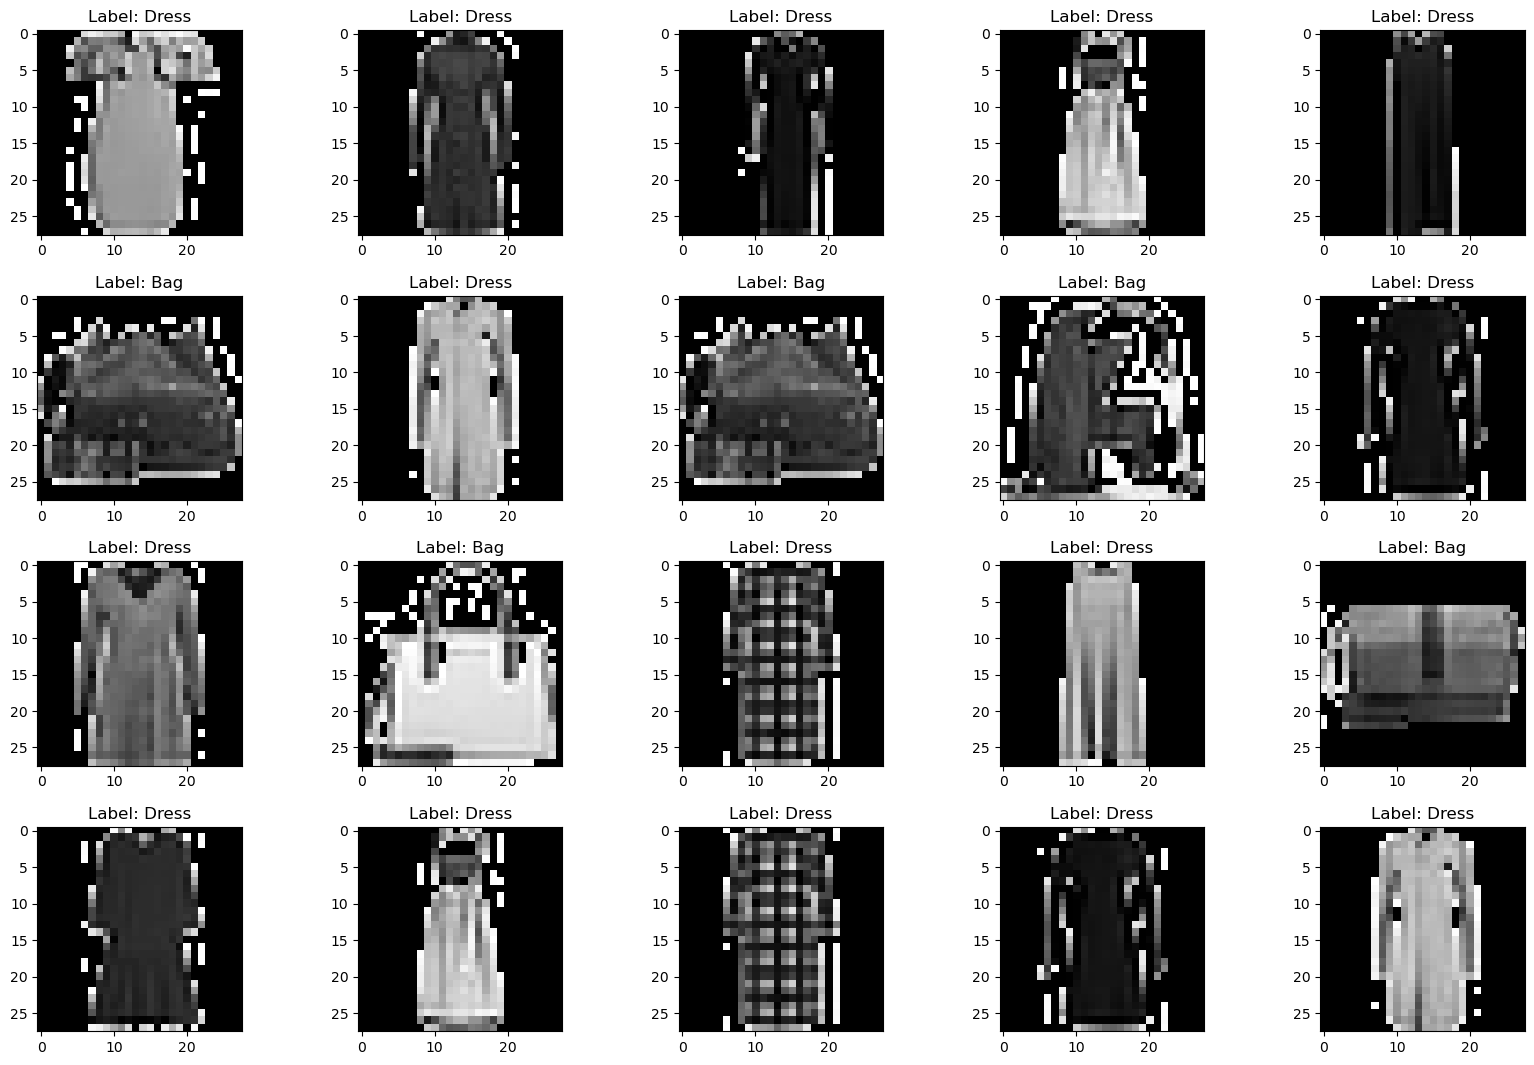

In [9]:
# Nothing to do here, just run the cell.
# A routine that you can use for plotting some of the data. 
arr = ['Dress', 'Bag'] # 0: Dress,  1: Bag
a = np.random.randint(1,40,20)
plt.figure(figsize=(20, 13))
for n,i in enumerate(a):
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(X_train_filtered[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train_filtered[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

<h3 style="color:rgb(210,90,80)">Code 2.2 (5 Points):</h3>

In [10]:
def fit_predict(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, seed: int) -> tuple[RandomForestClassifier, np.ndarray]:
    """Function fits a RandomForestClassifier on the training data and returns predictions on the test data as well as the fitted model.

    Parameters
    ----------
    X_train : np.ndarray
        Training data matrix.
    y_train : np.ndarray
        Training labels vector.
    X_test : np.ndarray
        Test data matrix.
    seed : int
        Random seed used for initializing the classifier.

    Returns
    -------
    tuple of RandomForestClassifier, np.ndarray
        - model : RandomForestClassifier
            The fitted classifier.
        - prediction : np.ndarray      
            The prediction on the given test set.
    """
    # YOUR CODE HERE
    # Initialize the RandomForestClassifier with the given random seed
    model = RandomForestClassifier(random_state=seed)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    prediction = model.predict(X_test)
    
    return model, prediction

In [11]:
# DO NOT DELETE THIS CELL!
model, prediction = fit_predict(X_train[:1000], y_train[:1000], X_test[:1000], RSEED)
assert isinstance(model, RandomForestClassifier), "The fitted model is not a RandomForestClassifier!"
assert isinstance(prediction, np.ndarray), "The prediction is not a np.ndarray!"
assert len(prediction) == 1000, "The number of predictions is wrong!"
np.testing.assert_array_equal(prediction[:5], np.array([0, 1, 2, 2, 1]))
np.testing.assert_array_equal(prediction[-5:], np.array([9, 2, 9, 4, 5]))

In [12]:
# Nothing to do here, just run the cell.
model, prediction = fit_predict(X_train_filtered, y_train_filtered, X_test_filtered, RSEED)

<h3 style="color:rgb(210,90,80)">Code 2.3 (15 Points):</h3>

In [16]:
def get_n_wrong_samples(X_test: np.ndarray, y_test: np.ndarray, prediction: np.ndarray) -> tuple[int, int, np.ndarray, np.ndarray, np.ndarray]:
    """Calculates the size of the test set, number of misclassified samples, the samples that are misclassified,
    the actual labels of the misclassified samples, and the predicted labels that are incorrect.
    
    Parameters
    ----------
    X_test : np.ndarray
        Test data matrix.
    y_test : np.ndarray
        Test labels vector.
    prediction : np.ndarray
        The predicted labels vector from the model.
    
    Returns
    -------
    tuple of int, np.ndarray
        - test_size : int
            The size of the test set.
        - num_wrong : int
            The number of misclassified samples.
        - wrong_samples : np.ndarray
            The misclassified samples.
        - wrong_labels : np.ndarray
            The actual labels of the misclassified samples.
        - wrong_predictions : np.ndarray
            The predicted incorrect labels.
    """
    # YOUR CODE HERE
    # Calculate the size of the test set
    test_size = int(X_test.shape[0])
    
    # Identify misclassified samples
    misclassified_mask = y_test != prediction
    num_wrong = int(np.sum(misclassified_mask))
    
    # Extract misclassified samples and their labels
    wrong_samples = X_test[misclassified_mask]
    wrong_labels = y_test[misclassified_mask]
    wrong_predictions = prediction[misclassified_mask]
    
    return test_size, num_wrong, wrong_samples, wrong_labels, wrong_predictions

In [17]:
# DO NOT DELETE THIS CELL!
test_size, num_wrong, wrong_samples, wrong_labels, wrong_predictions = get_n_wrong_samples(X_test_testing, y_test_testing, np.array([2, 1, 3, 3, 3, 0, 3, 8, 0, 4]))
assert isinstance(test_size, int), "The size of the test set is not an integer!"
assert test_size == 10, "The size of the test set is incorrect!"

In [18]:
# DO NOT DELETE THIS CELL!
assert isinstance(num_wrong, int), "The number of misclassified samples is not an integer!"
assert num_wrong == 3, "The number of misclassified samples is incorrect!"

In [19]:
# DO NOT DELETE THIS CELL!
assert isinstance(wrong_samples, np.ndarray), "The misclassified samples are not a np.ndarray!"
np.testing.assert_array_equal(wrong_samples, np.array([[21], [26], [29]]))

In [20]:
# DO NOT DELETE THIS CELL!
assert isinstance(wrong_labels, np.ndarray), "The misclassified labels are not a np.ndarray!"
np.testing.assert_array_equal(wrong_labels, np.array([3, 0, 0]))

In [21]:
# DO NOT DELETE THIS CELL!
assert isinstance(wrong_predictions, np.ndarray), "The misclassified predictions are not a np.ndarray!"
np.testing.assert_array_equal(wrong_predictions, np.array([1, 3, 4]))

In [22]:
# Nothing to do here, just run the cell.
size_test, num_wrong, wrong_samples, wrong_labels, wrong_predictions = get_n_wrong_samples(X_test_filtered, y_test_filtered, prediction)
print("Number of test samples: {0}\nNumber of misclassified samples: {1}".format(size_test, num_wrong))

Number of test samples: 2000
Number of misclassified samples: 11


In [23]:
def plot_wrong_predictions(wrong_samples: np.ndarray, wrong_labels: np.ndarray, wrong_predictions: np.ndarray):
    """Function plots a figure that shows misclassified samples with their predicted and actual label.

    Parameters
    ----------
    wrong_samples : np.ndarray
        The samples that got misclassified by the classifier.
    wrong_labels : np.ndarray
        The actual true labels of the misclassified samples.
    wrong_predictions : np.ndarray
        The predicted labels of the misclassified samples.
    """
    # YOUR CODE HERE
    # Define the maximum number of samples to plot
    max_plots = 20
    num_wrong = wrong_samples.shape[0]
    plots_to_show = min(max_plots, num_wrong)
    
    if plots_to_show == 0:
        print("No misclassified samples to display.")
        return
    
    # Define the grid size for plotting
    cols = 5
    rows = (plots_to_show + cols - 1) // cols  # Ceiling division to determine rows
    
    plt.figure(figsize=(15, 3 * rows))
    
    for i in range(plots_to_show):
        plt.subplot(rows, cols, i + 1)
        
        # Reshape the flat image into 28x28
        image = wrong_samples[i].reshape(28, 28)
        
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
        # Set the title with actual and predicted labels
        plt.title(f"Actual: {wrong_labels[i]}, Predicted: {wrong_predictions[i]}")
    
    plt.tight_layout()
    plt.show()

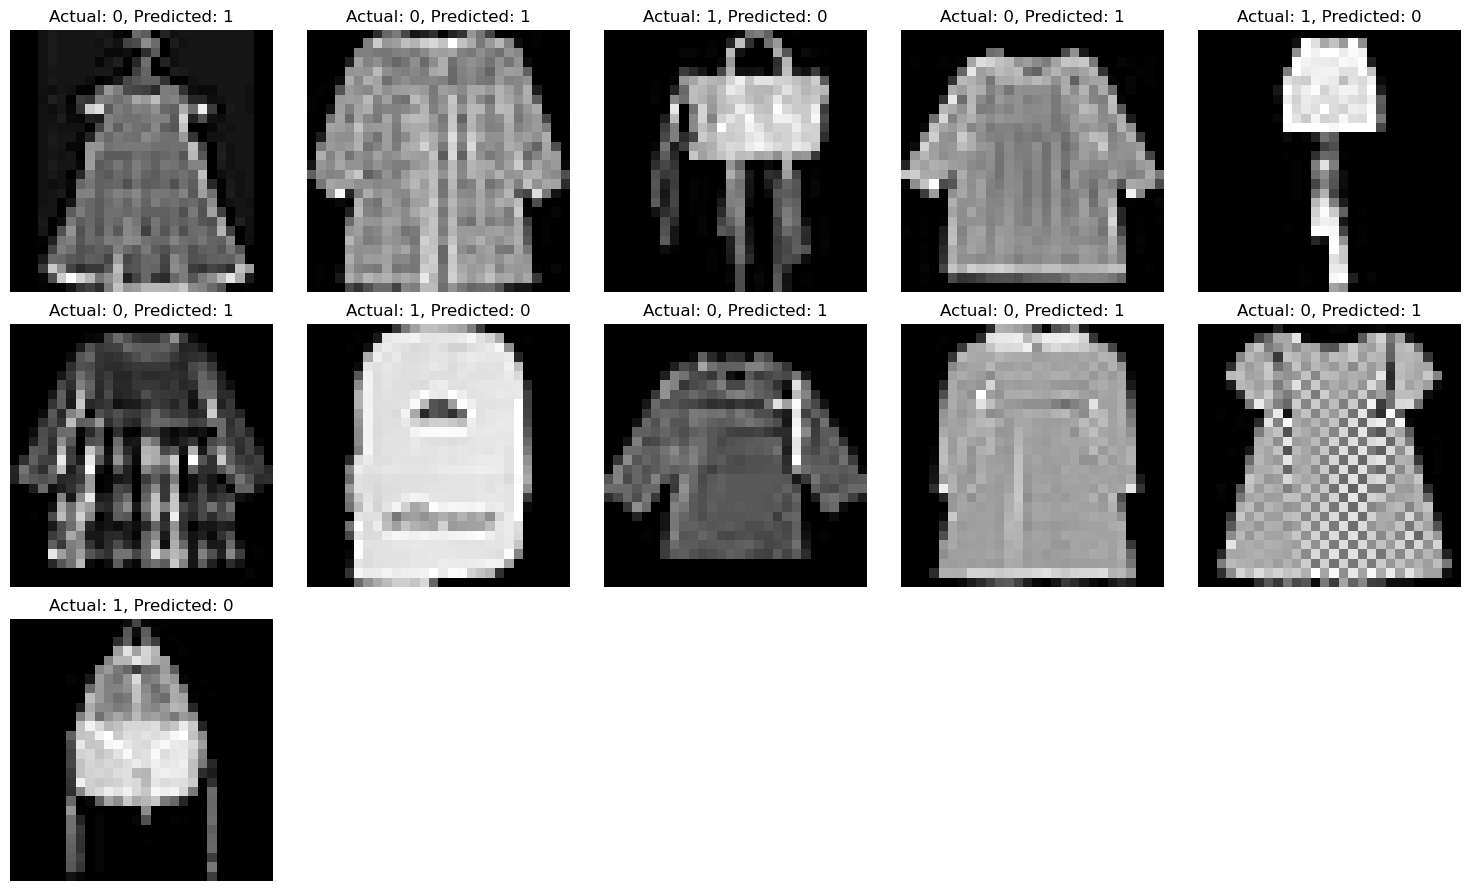

In [24]:
# Nothing to do here, just run the cell.
plot_wrong_predictions(wrong_samples, wrong_labels, wrong_predictions)

<h3 style="color:rgb(210,90,80)">Plot 2.4 (20 Points):</h3>

In [30]:
def plot_heatmaps(X_train: np.ndarray, y_train: np.ndarray, model: RandomForestClassifier):
    """Create a plot as described in the task description above.

    Parameters
    ----------
    X_train : np.ndarray
        Training data matrix.
    y_train : np.ndarray
        Training labels vector.
    model : RandomForestClassifier
        Your already trained classifier.
    """
    # YOUR CODE HERE
    # Split the training data into dresses and bags
    dresses = X_train[y_train == 0]
    bags = X_train[y_train == 1]
    
    # Calculate the average of the features for each class
    avg_dress = dresses.mean(axis=0).reshape(28, 28)
    avg_bag = bags.mean(axis=0).reshape(28, 28)
    
    # Calculate the difference between average dresses and average bags
    diff = avg_dress - avg_bag
    
    # Retrieve feature importances from the model
    feature_importances = model.feature_importances_.reshape(28, 28)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(18, 5))
    
    # Plot average dress
    plt.subplot(1, 4, 1)
    sns.heatmap(avg_dress, cmap='viridis')
    plt.title('Average Dress')
    plt.axis('off')
    
    # Plot average bag
    plt.subplot(1, 4, 2)
    sns.heatmap(avg_bag, cmap='viridis')
    plt.title('Average Bag')
    plt.axis('off')
    
    # Plot difference
    plt.subplot(1, 4, 3)
    sns.heatmap(diff, cmap='bwr')
    plt.title('Average Dress - Average Bag')
    plt.axis('off')
    
    # Plot feature importances
    plt.subplot(1, 4, 4)
    sns.heatmap(feature_importances, cmap='coolwarm')
    plt.title('Feature Importances')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

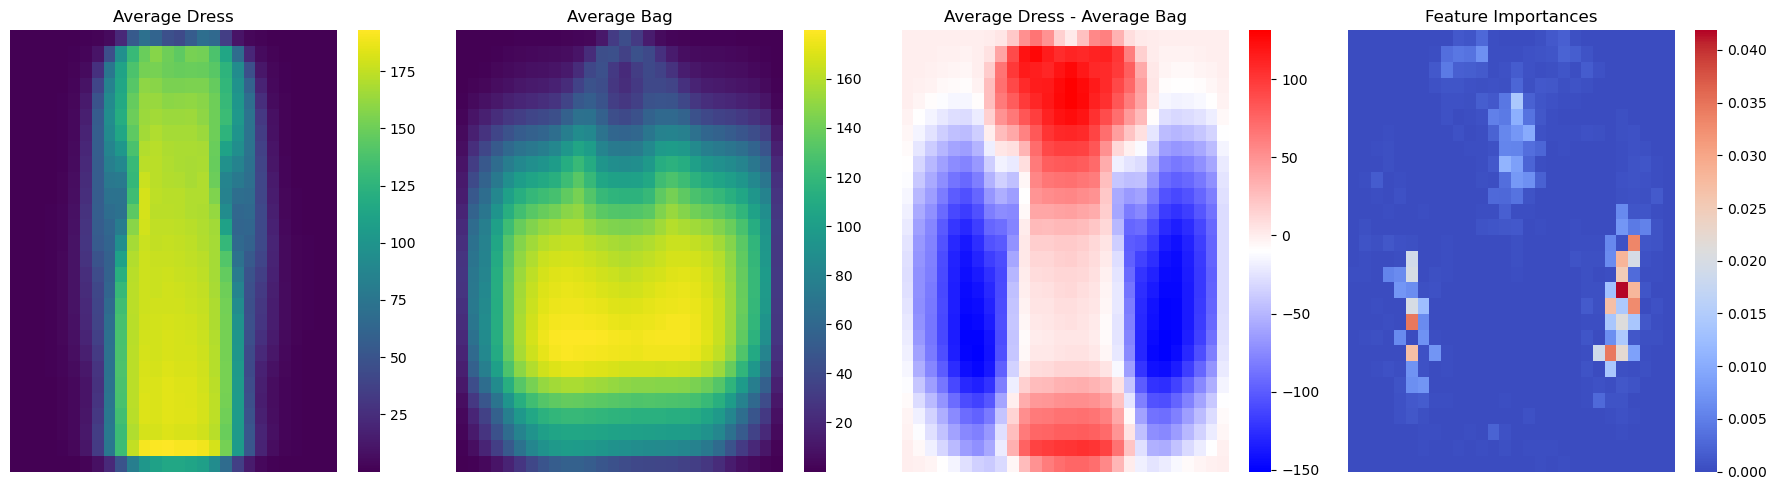

In [31]:
# Nothing to do here, just run the cell.
plot_heatmaps(X_train_filtered, y_train_filtered, model)

If you have solved the previous task correctly, the resulting plot should look close to this:<br>
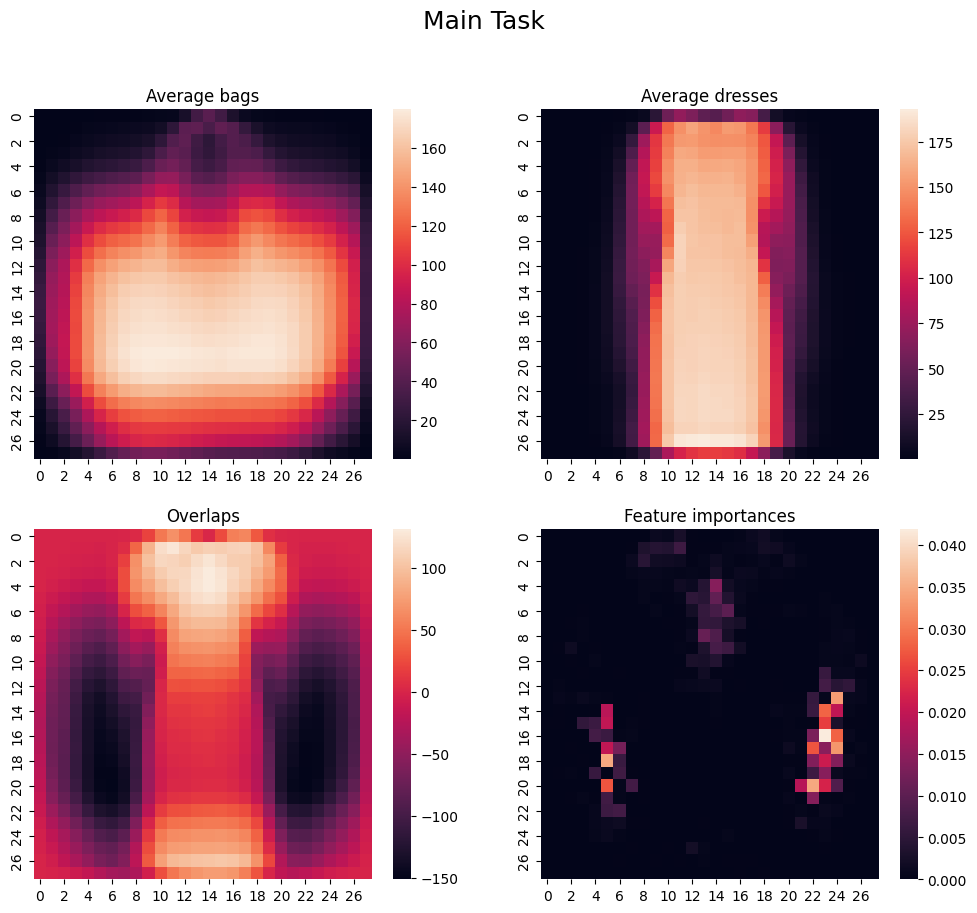

<h3 style="color:rgb(210,90,80)">Question 2.5 (5 Points):</h3>

What observations can you make? 
<br>(Multiple answers might be correct)
    
a_) RF achieves an accuracy higher than 90% on the test set.<br>
b_) The most important features are located in image regions that primarily show either only bags or dresses as depicted by the plots of average bags and dresses.<br>
c_) If one pixel would always be bright for bags but never for dresses, the RF classifier would certainly learn to use only this pixel as a feature.<br>
d_) Comparing the misclassified bags to other bags suggests that they might be outliers as they are rather tall, but not as long as most other bags.

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a_)** is correct, define a variable `a_` and set it to `True`, the same applies to **b_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [32]:
# YOUR CODE HERE
a_ = True
b_ = True
c_ = False
d_ = False

In [33]:
# DO NOT DELETE THIS CELL!
assert a_ is not None, "Store True/False!"
assert a_ in [True, False], "Invalid Answer!"

In [34]:
# DO NOT DELETE THIS CELL!
assert b_ is not None, "Store True/False!"
assert b_ in [True, False], "Invalid Answer!"

In [35]:
# DO NOT DELETE THIS CELL!
assert c_ is not None, "Store True/False!"
assert c_ in [True, False], "Invalid Answer!"

In [36]:
# DO NOT DELETE THIS CELL!
assert d_ is not None, "Store True/False!"
assert d_ in [True, False], "Invalid Answer!"